# Emulator examples
Let's exemplify how to use the emulator tools.

## Model
Let's define a model to emulate.

In [1]:
import numpy as np

def sine(a=0, b=0):  # named kwargs
    x = np.pi + np.linspace(0., np.pi, 100)
    return {'x': x, 'y': a * x * np.sin(b * x)}  # return "state" dictionary

## Taylor expansion

In [2]:
import os
from cosmoprimo.emulators.tools import Emulator, EmulatedCalculator, TaylorEmulatorEngine, setup_logging

params = {'a': (0.9, 1.1), 'b': (0.9, 1.1)}  # parameter variation ranges
emulator = Emulator(sine, params, engine=TaylorEmulatorEngine(order={'*': 4}))  # order 4 Taylor expansion
emulator.set_samples()
emulator.fit()

# Let's save the emulator
emulator_dir = '_tests'
fn = os.path.join(emulator_dir, 'emu.npy')
emulator.save(fn)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
# ... and reload it
emulator = EmulatedCalculator.load(fn)
state = emulator(a=1)

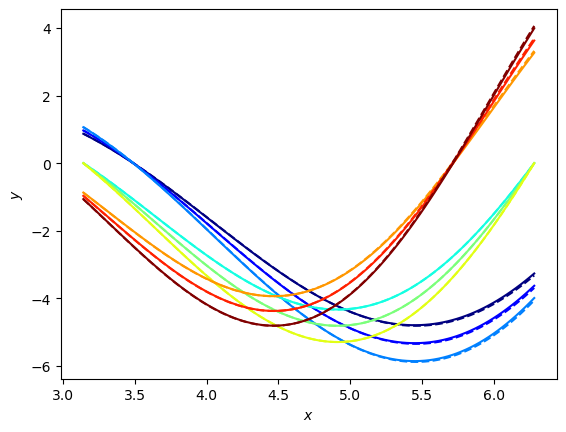

In [4]:
from matplotlib import pyplot as plt

def plot(calculator, emulator, params):
    ax = plt.gca()
    values = np.array(np.meshgrid(*[np.linspace(*limits, 3) for limits in params.values()], indexing='ij')).T.reshape(-1, len(params))
    cmap = plt.get_cmap('jet', len(values))

    for ivalue, value in enumerate(values):
        value = dict(zip(params, value))
        ref = calculator(**value)
        emulated = emulator(**value)
        color = cmap(ivalue / len(values))
        ax.plot(ref['x'], ref['y'], linestyle='--', color=color)
        ax.plot(emulated['x'], emulated['y'], linestyle='-', color=color)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

plot(sine, emulator, params)
plt.show()

## MLP emulator

In [5]:
import os
from cosmoprimo.emulators.tools import Emulator, EmulatedCalculator, MLPEmulatorEngine, setup_logging

params = {'a': (0.9, 1.1), 'b': (0.9, 1.1)}  # parameter variation ranges
emulator = Emulator(sine, params, engine=MLPEmulatorEngine(nhidden=(4,), npcs=10))
emulator.set_samples()
emulator.fit()

emulator = emulator.to_calculator()

2023-12-17 20:37:24.508643: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-17 20:37:24.508686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-17 20:37:24.510121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-17 20:37:25.521269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Epoch 1/1000
250/250 - 2s - loss: 0.7252 - mse: 0.7252 - val_loss: 0.0562 - val_mse: 0.0562 - 2s/epoch - 7ms/step
Epoch 2/1000
250/250 - 1s - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0056 - val_mse: 0.0056 - 852ms/epoch - 3ms/step
Epoch 3/1000
250/250 - 1s - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0018 - val_mse: 0.0018 - 754ms/epoch - 3ms/step
Epoch 4/1000
250/250 - 1s - loss: 0.0013 - mse: 0.0013 - val_loss: 9.3087e-04 - val_mse: 9.3087e-04 - 881ms/epoch - 4ms/step
Epoch 5/1000
250/250 - 1s - loss: 7.8710e-04 - mse: 7.8710e-04 - val_loss: 6.2828e-04 - val_mse: 6.2828e-04 - 794ms/epoch - 3ms/step
Epoch 6/1000
250/250 - 1s - loss: 5.6983e-04 - mse: 5.6983e-04 - val_loss: 4.8337e-04 - val_mse: 4.8337e-04 - 748ms/epoch - 3ms/step
Epoch 7/1000
250/250 - 1s - loss: 4.6352e-04 - mse: 4.6352e-04 - val_loss: 4.2645e-04 - val_mse: 4.2645e-04 - 827ms/epoch - 3ms/step
Epoch 8/1000
250/250 - 1s - loss: 4.0039e-04 - mse: 4.0039e-04 - val_loss: 3.8607e-04 - val_mse: 3.8607e-04 - 678ms/epoch - 3ms/

Epoch 63/1000
250/250 - 1s - loss: 2.2514e-04 - mse: 2.2514e-04 - val_loss: 2.4307e-04 - val_mse: 2.4307e-04 - 745ms/epoch - 3ms/step
Epoch 64/1000
250/250 - 1s - loss: 2.2529e-04 - mse: 2.2529e-04 - val_loss: 2.0719e-04 - val_mse: 2.0719e-04 - 726ms/epoch - 3ms/step
Epoch 65/1000
250/250 - 1s - loss: 2.1921e-04 - mse: 2.1921e-04 - val_loss: 2.5002e-04 - val_mse: 2.5002e-04 - 729ms/epoch - 3ms/step
Epoch 66/1000
250/250 - 1s - loss: 2.2447e-04 - mse: 2.2447e-04 - val_loss: 1.9900e-04 - val_mse: 1.9900e-04 - 736ms/epoch - 3ms/step
Epoch 67/1000
250/250 - 1s - loss: 2.1537e-04 - mse: 2.1537e-04 - val_loss: 2.2015e-04 - val_mse: 2.2015e-04 - 750ms/epoch - 3ms/step
Epoch 68/1000
250/250 - 1s - loss: 2.2106e-04 - mse: 2.2106e-04 - val_loss: 2.1603e-04 - val_mse: 2.1603e-04 - 731ms/epoch - 3ms/step
Epoch 69/1000
250/250 - 1s - loss: 2.2324e-04 - mse: 2.2324e-04 - val_loss: 2.2587e-04 - val_mse: 2.2587e-04 - 727ms/epoch - 3ms/step
Epoch 70/1000
250/250 - 1s - loss: 2.2477e-04 - mse: 2.2477e-0

Epoch 124/1000
250/250 - 1s - loss: 2.1952e-04 - mse: 2.1952e-04 - val_loss: 2.0580e-04 - val_mse: 2.0580e-04 - 745ms/epoch - 3ms/step
Epoch 125/1000
250/250 - 1s - loss: 2.2073e-04 - mse: 2.2073e-04 - val_loss: 2.0732e-04 - val_mse: 2.0732e-04 - 752ms/epoch - 3ms/step
Epoch 126/1000
250/250 - 1s - loss: 2.0906e-04 - mse: 2.0906e-04 - val_loss: 2.0775e-04 - val_mse: 2.0775e-04 - 747ms/epoch - 3ms/step
Epoch 127/1000
250/250 - 1s - loss: 2.1178e-04 - mse: 2.1178e-04 - val_loss: 2.0428e-04 - val_mse: 2.0428e-04 - 740ms/epoch - 3ms/step
Epoch 128/1000
250/250 - 1s - loss: 2.0952e-04 - mse: 2.0952e-04 - val_loss: 1.9762e-04 - val_mse: 1.9762e-04 - 751ms/epoch - 3ms/step
Epoch 129/1000
250/250 - 1s - loss: 2.0905e-04 - mse: 2.0905e-04 - val_loss: 1.9996e-04 - val_mse: 1.9996e-04 - 756ms/epoch - 3ms/step
Epoch 130/1000
250/250 - 1s - loss: 2.1733e-04 - mse: 2.1733e-04 - val_loss: 1.9757e-04 - val_mse: 1.9757e-04 - 737ms/epoch - 3ms/step
Epoch 131/1000
250/250 - 1s - loss: 2.1558e-04 - mse: 2

Epoch 185/1000
250/250 - 1s - loss: 5.2329e-05 - mse: 5.2329e-05 - val_loss: 4.5597e-05 - val_mse: 4.5597e-05 - 738ms/epoch - 3ms/step
Epoch 186/1000
250/250 - 1s - loss: 5.1423e-05 - mse: 5.1423e-05 - val_loss: 3.9209e-05 - val_mse: 3.9209e-05 - 691ms/epoch - 3ms/step
Epoch 187/1000
250/250 - 1s - loss: 4.4052e-05 - mse: 4.4052e-05 - val_loss: 3.9154e-05 - val_mse: 3.9154e-05 - 652ms/epoch - 3ms/step
Epoch 188/1000
250/250 - 1s - loss: 5.0684e-05 - mse: 5.0684e-05 - val_loss: 3.9475e-05 - val_mse: 3.9475e-05 - 650ms/epoch - 3ms/step
Epoch 189/1000
250/250 - 1s - loss: 4.8165e-05 - mse: 4.8165e-05 - val_loss: 4.3906e-05 - val_mse: 4.3906e-05 - 657ms/epoch - 3ms/step
Epoch 190/1000
250/250 - 1s - loss: 4.5096e-05 - mse: 4.5096e-05 - val_loss: 4.2959e-05 - val_mse: 4.2959e-05 - 631ms/epoch - 3ms/step
Epoch 191/1000
250/250 - 1s - loss: 4.8377e-05 - mse: 4.8377e-05 - val_loss: 3.9196e-05 - val_mse: 3.9196e-05 - 614ms/epoch - 2ms/step
Epoch 192/1000
250/250 - 1s - loss: 4.4666e-05 - mse: 4

Epoch 246/1000
250/250 - 1s - loss: 3.8147e-05 - mse: 3.8147e-05 - val_loss: 2.5729e-05 - val_mse: 2.5729e-05 - 655ms/epoch - 3ms/step
Epoch 247/1000
250/250 - 1s - loss: 2.6447e-05 - mse: 2.6447e-05 - val_loss: 2.2696e-05 - val_mse: 2.2696e-05 - 642ms/epoch - 3ms/step
Epoch 248/1000
250/250 - 1s - loss: 2.7345e-05 - mse: 2.7345e-05 - val_loss: 2.9725e-05 - val_mse: 2.9725e-05 - 646ms/epoch - 3ms/step
Epoch 249/1000
250/250 - 1s - loss: 3.7666e-05 - mse: 3.7666e-05 - val_loss: 2.8069e-05 - val_mse: 2.8069e-05 - 669ms/epoch - 3ms/step
Epoch 250/1000
250/250 - 1s - loss: 2.5075e-05 - mse: 2.5075e-05 - val_loss: 2.2566e-05 - val_mse: 2.2566e-05 - 604ms/epoch - 2ms/step
Epoch 251/1000
250/250 - 1s - loss: 3.1180e-05 - mse: 3.1180e-05 - val_loss: 2.2410e-05 - val_mse: 2.2410e-05 - 601ms/epoch - 2ms/step
Epoch 252/1000
250/250 - 1s - loss: 2.5548e-05 - mse: 2.5548e-05 - val_loss: 2.3103e-05 - val_mse: 2.3103e-05 - 575ms/epoch - 2ms/step
Epoch 253/1000
250/250 - 1s - loss: 3.5261e-05 - mse: 3

Epoch 307/1000
250/250 - 1s - loss: 2.2622e-05 - mse: 2.2622e-05 - val_loss: 1.8780e-05 - val_mse: 1.8780e-05 - 659ms/epoch - 3ms/step
Epoch 308/1000
250/250 - 1s - loss: 2.4551e-05 - mse: 2.4551e-05 - val_loss: 3.2714e-05 - val_mse: 3.2714e-05 - 645ms/epoch - 3ms/step
Epoch 309/1000
250/250 - 1s - loss: 2.3133e-05 - mse: 2.3133e-05 - val_loss: 1.9747e-05 - val_mse: 1.9747e-05 - 669ms/epoch - 3ms/step
Epoch 310/1000
250/250 - 1s - loss: 2.3784e-05 - mse: 2.3784e-05 - val_loss: 3.1795e-05 - val_mse: 3.1795e-05 - 646ms/epoch - 3ms/step
Epoch 311/1000
250/250 - 1s - loss: 2.7371e-05 - mse: 2.7371e-05 - val_loss: 1.8896e-05 - val_mse: 1.8896e-05 - 664ms/epoch - 3ms/step
Epoch 312/1000
250/250 - 1s - loss: 2.0537e-05 - mse: 2.0537e-05 - val_loss: 2.3973e-05 - val_mse: 2.3973e-05 - 659ms/epoch - 3ms/step
Epoch 313/1000
250/250 - 1s - loss: 2.6605e-05 - mse: 2.6605e-05 - val_loss: 2.1401e-05 - val_mse: 2.1401e-05 - 670ms/epoch - 3ms/step
Epoch 314/1000
250/250 - 1s - loss: 2.6586e-05 - mse: 2

Epoch 368/1000
250/250 - 1s - loss: 2.0982e-05 - mse: 2.0982e-05 - val_loss: 1.9777e-05 - val_mse: 1.9777e-05 - 620ms/epoch - 2ms/step
Epoch 369/1000
250/250 - 1s - loss: 1.9628e-05 - mse: 1.9628e-05 - val_loss: 1.8140e-05 - val_mse: 1.8140e-05 - 648ms/epoch - 3ms/step
Epoch 370/1000
250/250 - 1s - loss: 2.1034e-05 - mse: 2.1034e-05 - val_loss: 1.7803e-05 - val_mse: 1.7803e-05 - 637ms/epoch - 3ms/step
Epoch 371/1000
250/250 - 1s - loss: 2.3467e-05 - mse: 2.3467e-05 - val_loss: 2.7625e-05 - val_mse: 2.7625e-05 - 631ms/epoch - 3ms/step
Epoch 372/1000
250/250 - 1s - loss: 2.3691e-05 - mse: 2.3691e-05 - val_loss: 2.4385e-05 - val_mse: 2.4385e-05 - 650ms/epoch - 3ms/step
Epoch 373/1000
250/250 - 1s - loss: 2.1203e-05 - mse: 2.1203e-05 - val_loss: 2.0179e-05 - val_mse: 2.0179e-05 - 659ms/epoch - 3ms/step
Epoch 374/1000
250/250 - 1s - loss: 2.3707e-05 - mse: 2.3707e-05 - val_loss: 1.7271e-05 - val_mse: 1.7271e-05 - 639ms/epoch - 3ms/step
Epoch 375/1000
250/250 - 1s - loss: 2.1806e-05 - mse: 2

Epoch 429/1000
250/250 - 1s - loss: 2.3844e-05 - mse: 2.3844e-05 - val_loss: 1.6982e-05 - val_mse: 1.6982e-05 - 653ms/epoch - 3ms/step
Epoch 430/1000
250/250 - 1s - loss: 1.9597e-05 - mse: 1.9597e-05 - val_loss: 1.7695e-05 - val_mse: 1.7695e-05 - 545ms/epoch - 2ms/step
Epoch 431/1000
250/250 - 1s - loss: 2.2638e-05 - mse: 2.2638e-05 - val_loss: 1.9947e-05 - val_mse: 1.9947e-05 - 650ms/epoch - 3ms/step
Epoch 432/1000
250/250 - 1s - loss: 2.2681e-05 - mse: 2.2681e-05 - val_loss: 2.1896e-05 - val_mse: 2.1896e-05 - 636ms/epoch - 3ms/step
Epoch 433/1000
250/250 - 1s - loss: 2.2741e-05 - mse: 2.2741e-05 - val_loss: 2.2665e-05 - val_mse: 2.2665e-05 - 659ms/epoch - 3ms/step
Epoch 434/1000
250/250 - 1s - loss: 2.3070e-05 - mse: 2.3070e-05 - val_loss: 1.7925e-05 - val_mse: 1.7925e-05 - 661ms/epoch - 3ms/step
Epoch 435/1000
250/250 - 1s - loss: 2.0743e-05 - mse: 2.0743e-05 - val_loss: 2.2104e-05 - val_mse: 2.2104e-05 - 644ms/epoch - 3ms/step
Epoch 436/1000
250/250 - 1s - loss: 2.2818e-05 - mse: 2

Epoch 52/1000
125/125 - 0s - loss: 1.5782e-05 - mse: 1.5782e-05 - val_loss: 1.5609e-05 - val_mse: 1.5609e-05 - 436ms/epoch - 3ms/step
Epoch 53/1000
125/125 - 0s - loss: 1.5804e-05 - mse: 1.5804e-05 - val_loss: 1.5477e-05 - val_mse: 1.5477e-05 - 439ms/epoch - 4ms/step
Epoch 54/1000
125/125 - 0s - loss: 1.5744e-05 - mse: 1.5744e-05 - val_loss: 1.5535e-05 - val_mse: 1.5535e-05 - 445ms/epoch - 4ms/step
Epoch 55/1000
125/125 - 0s - loss: 1.5854e-05 - mse: 1.5854e-05 - val_loss: 1.5831e-05 - val_mse: 1.5831e-05 - 396ms/epoch - 3ms/step
Epoch 56/1000
125/125 - 0s - loss: 1.5836e-05 - mse: 1.5836e-05 - val_loss: 1.5592e-05 - val_mse: 1.5592e-05 - 439ms/epoch - 4ms/step
Epoch 57/1000
125/125 - 0s - loss: 1.5708e-05 - mse: 1.5708e-05 - val_loss: 1.5812e-05 - val_mse: 1.5812e-05 - 423ms/epoch - 3ms/step
Epoch 58/1000
125/125 - 0s - loss: 1.5768e-05 - mse: 1.5768e-05 - val_loss: 1.5566e-05 - val_mse: 1.5566e-05 - 417ms/epoch - 3ms/step
Epoch 59/1000
125/125 - 0s - loss: 1.5721e-05 - mse: 1.5721e-0

125/125 - 0s - loss: 1.5549e-05 - mse: 1.5549e-05 - val_loss: 1.5357e-05 - val_mse: 1.5357e-05 - 433ms/epoch - 3ms/step
Epoch 114/1000
125/125 - 0s - loss: 1.5481e-05 - mse: 1.5481e-05 - val_loss: 1.5531e-05 - val_mse: 1.5531e-05 - 439ms/epoch - 4ms/step
Epoch 115/1000
125/125 - 0s - loss: 1.5579e-05 - mse: 1.5579e-05 - val_loss: 1.5859e-05 - val_mse: 1.5859e-05 - 431ms/epoch - 3ms/step
Epoch 116/1000
125/125 - 0s - loss: 1.5555e-05 - mse: 1.5555e-05 - val_loss: 1.5317e-05 - val_mse: 1.5317e-05 - 424ms/epoch - 3ms/step
Epoch 117/1000
125/125 - 0s - loss: 1.5584e-05 - mse: 1.5584e-05 - val_loss: 1.5417e-05 - val_mse: 1.5417e-05 - 430ms/epoch - 3ms/step
Epoch 118/1000
125/125 - 0s - loss: 1.5619e-05 - mse: 1.5619e-05 - val_loss: 1.5632e-05 - val_mse: 1.5632e-05 - 431ms/epoch - 3ms/step
Epoch 119/1000
125/125 - 0s - loss: 1.5553e-05 - mse: 1.5553e-05 - val_loss: 1.5373e-05 - val_mse: 1.5373e-05 - 416ms/epoch - 3ms/step
Epoch 120/1000
125/125 - 0s - loss: 1.5557e-05 - mse: 1.5557e-05 - val

Epoch 174/1000
125/125 - 0s - loss: 1.5388e-05 - mse: 1.5388e-05 - val_loss: 1.5128e-05 - val_mse: 1.5128e-05 - 386ms/epoch - 3ms/step
Epoch 175/1000
125/125 - 0s - loss: 1.5390e-05 - mse: 1.5390e-05 - val_loss: 1.5247e-05 - val_mse: 1.5247e-05 - 435ms/epoch - 3ms/step
Epoch 176/1000
125/125 - 0s - loss: 1.5498e-05 - mse: 1.5498e-05 - val_loss: 1.5130e-05 - val_mse: 1.5130e-05 - 429ms/epoch - 3ms/step
Epoch 177/1000
125/125 - 0s - loss: 1.5389e-05 - mse: 1.5389e-05 - val_loss: 1.5354e-05 - val_mse: 1.5354e-05 - 433ms/epoch - 3ms/step
Epoch 178/1000
125/125 - 0s - loss: 1.5408e-05 - mse: 1.5408e-05 - val_loss: 1.5200e-05 - val_mse: 1.5200e-05 - 412ms/epoch - 3ms/step
Epoch 179/1000
125/125 - 0s - loss: 1.5341e-05 - mse: 1.5341e-05 - val_loss: 1.5503e-05 - val_mse: 1.5503e-05 - 398ms/epoch - 3ms/step
Epoch 180/1000
125/125 - 0s - loss: 1.5374e-05 - mse: 1.5374e-05 - val_loss: 1.5084e-05 - val_mse: 1.5084e-05 - 406ms/epoch - 3ms/step
Epoch 181/1000
125/125 - 0s - loss: 1.5446e-05 - mse: 1

Epoch 235/1000
125/125 - 0s - loss: 1.5181e-05 - mse: 1.5181e-05 - val_loss: 1.4933e-05 - val_mse: 1.4933e-05 - 392ms/epoch - 3ms/step
Epoch 236/1000
125/125 - 0s - loss: 1.5289e-05 - mse: 1.5289e-05 - val_loss: 1.5478e-05 - val_mse: 1.5478e-05 - 384ms/epoch - 3ms/step
Epoch 237/1000
125/125 - 0s - loss: 1.5278e-05 - mse: 1.5278e-05 - val_loss: 1.5128e-05 - val_mse: 1.5128e-05 - 405ms/epoch - 3ms/step
Epoch 238/1000
125/125 - 0s - loss: 1.5233e-05 - mse: 1.5233e-05 - val_loss: 1.5059e-05 - val_mse: 1.5059e-05 - 410ms/epoch - 3ms/step
Epoch 239/1000
125/125 - 0s - loss: 1.5332e-05 - mse: 1.5332e-05 - val_loss: 1.5422e-05 - val_mse: 1.5422e-05 - 419ms/epoch - 3ms/step
Epoch 240/1000
125/125 - 0s - loss: 1.5275e-05 - mse: 1.5275e-05 - val_loss: 1.5165e-05 - val_mse: 1.5165e-05 - 366ms/epoch - 3ms/step
Epoch 241/1000
125/125 - 0s - loss: 1.5283e-05 - mse: 1.5283e-05 - val_loss: 1.5179e-05 - val_mse: 1.5179e-05 - 404ms/epoch - 3ms/step
Epoch 242/1000
125/125 - 0s - loss: 1.5262e-05 - mse: 1

Epoch 296/1000
125/125 - 0s - loss: 1.5090e-05 - mse: 1.5090e-05 - val_loss: 1.5338e-05 - val_mse: 1.5338e-05 - 381ms/epoch - 3ms/step
Epoch 297/1000
125/125 - 0s - loss: 1.5166e-05 - mse: 1.5166e-05 - val_loss: 1.5084e-05 - val_mse: 1.5084e-05 - 395ms/epoch - 3ms/step
Epoch 298/1000
125/125 - 0s - loss: 1.5145e-05 - mse: 1.5145e-05 - val_loss: 1.5005e-05 - val_mse: 1.5005e-05 - 432ms/epoch - 3ms/step
Epoch 299/1000
125/125 - 0s - loss: 1.5093e-05 - mse: 1.5093e-05 - val_loss: 1.4919e-05 - val_mse: 1.4919e-05 - 403ms/epoch - 3ms/step
Epoch 300/1000
125/125 - 0s - loss: 1.5090e-05 - mse: 1.5090e-05 - val_loss: 1.5165e-05 - val_mse: 1.5165e-05 - 416ms/epoch - 3ms/step
Epoch 301/1000
125/125 - 0s - loss: 1.5126e-05 - mse: 1.5126e-05 - val_loss: 1.4930e-05 - val_mse: 1.4930e-05 - 415ms/epoch - 3ms/step
Epoch 302/1000
125/125 - 0s - loss: 1.5110e-05 - mse: 1.5110e-05 - val_loss: 1.5010e-05 - val_mse: 1.5010e-05 - 426ms/epoch - 3ms/step
Epoch 303/1000
125/125 - 0s - loss: 1.5055e-05 - mse: 1

Epoch 357/1000
125/125 - 0s - loss: 1.4994e-05 - mse: 1.4994e-05 - val_loss: 1.4984e-05 - val_mse: 1.4984e-05 - 415ms/epoch - 3ms/step
Epoch 358/1000
125/125 - 0s - loss: 1.5025e-05 - mse: 1.5025e-05 - val_loss: 1.4817e-05 - val_mse: 1.4817e-05 - 413ms/epoch - 3ms/step
Epoch 359/1000
125/125 - 0s - loss: 1.4994e-05 - mse: 1.4994e-05 - val_loss: 1.5071e-05 - val_mse: 1.5071e-05 - 425ms/epoch - 3ms/step
Epoch 360/1000
125/125 - 0s - loss: 1.5009e-05 - mse: 1.5009e-05 - val_loss: 1.5261e-05 - val_mse: 1.5261e-05 - 417ms/epoch - 3ms/step
Epoch 361/1000
125/125 - 0s - loss: 1.4974e-05 - mse: 1.4974e-05 - val_loss: 1.5056e-05 - val_mse: 1.5056e-05 - 439ms/epoch - 4ms/step
Epoch 362/1000
125/125 - 0s - loss: 1.4905e-05 - mse: 1.4905e-05 - val_loss: 1.5017e-05 - val_mse: 1.5017e-05 - 432ms/epoch - 3ms/step
Epoch 363/1000
125/125 - 0s - loss: 1.5025e-05 - mse: 1.5025e-05 - val_loss: 1.4721e-05 - val_mse: 1.4721e-05 - 403ms/epoch - 3ms/step
Epoch 364/1000
125/125 - 0s - loss: 1.4939e-05 - mse: 1

Epoch 418/1000
125/125 - 0s - loss: 1.4931e-05 - mse: 1.4931e-05 - val_loss: 1.4653e-05 - val_mse: 1.4653e-05 - 416ms/epoch - 3ms/step
Epoch 419/1000
125/125 - 0s - loss: 1.4840e-05 - mse: 1.4840e-05 - val_loss: 1.4847e-05 - val_mse: 1.4847e-05 - 438ms/epoch - 4ms/step
Epoch 420/1000
125/125 - 0s - loss: 1.4871e-05 - mse: 1.4871e-05 - val_loss: 1.4843e-05 - val_mse: 1.4843e-05 - 423ms/epoch - 3ms/step
Epoch 421/1000
125/125 - 0s - loss: 1.4899e-05 - mse: 1.4899e-05 - val_loss: 1.4802e-05 - val_mse: 1.4802e-05 - 419ms/epoch - 3ms/step
Epoch 422/1000
125/125 - 0s - loss: 1.4988e-05 - mse: 1.4988e-05 - val_loss: 1.4750e-05 - val_mse: 1.4750e-05 - 412ms/epoch - 3ms/step
Epoch 423/1000
125/125 - 0s - loss: 1.4980e-05 - mse: 1.4980e-05 - val_loss: 1.4809e-05 - val_mse: 1.4809e-05 - 422ms/epoch - 3ms/step
Epoch 424/1000
125/125 - 0s - loss: 1.4814e-05 - mse: 1.4814e-05 - val_loss: 1.4604e-05 - val_mse: 1.4604e-05 - 410ms/epoch - 3ms/step
Epoch 425/1000
125/125 - 0s - loss: 1.4979e-05 - mse: 1

Epoch 479/1000
125/125 - 0s - loss: 1.4905e-05 - mse: 1.4905e-05 - val_loss: 1.4786e-05 - val_mse: 1.4786e-05 - 393ms/epoch - 3ms/step
Epoch 480/1000
125/125 - 0s - loss: 1.4739e-05 - mse: 1.4739e-05 - val_loss: 1.4678e-05 - val_mse: 1.4678e-05 - 430ms/epoch - 3ms/step
Epoch 481/1000
125/125 - 0s - loss: 1.4777e-05 - mse: 1.4777e-05 - val_loss: 1.4624e-05 - val_mse: 1.4624e-05 - 422ms/epoch - 3ms/step
Epoch 482/1000
125/125 - 0s - loss: 1.4792e-05 - mse: 1.4792e-05 - val_loss: 1.4942e-05 - val_mse: 1.4942e-05 - 418ms/epoch - 3ms/step
Epoch 483/1000
125/125 - 0s - loss: 1.4774e-05 - mse: 1.4774e-05 - val_loss: 1.4687e-05 - val_mse: 1.4687e-05 - 434ms/epoch - 3ms/step
Epoch 484/1000
125/125 - 0s - loss: 1.4747e-05 - mse: 1.4747e-05 - val_loss: 1.4958e-05 - val_mse: 1.4958e-05 - 411ms/epoch - 3ms/step
Epoch 485/1000
125/125 - 0s - loss: 1.4772e-05 - mse: 1.4772e-05 - val_loss: 1.4592e-05 - val_mse: 1.4592e-05 - 434ms/epoch - 3ms/step
Epoch 486/1000
125/125 - 0s - loss: 1.4750e-05 - mse: 1

Epoch 540/1000
125/125 - 0s - loss: 1.4709e-05 - mse: 1.4709e-05 - val_loss: 1.4526e-05 - val_mse: 1.4526e-05 - 422ms/epoch - 3ms/step
Epoch 541/1000
125/125 - 0s - loss: 1.4681e-05 - mse: 1.4681e-05 - val_loss: 1.4652e-05 - val_mse: 1.4652e-05 - 413ms/epoch - 3ms/step
Epoch 542/1000
125/125 - 0s - loss: 1.4718e-05 - mse: 1.4718e-05 - val_loss: 1.4568e-05 - val_mse: 1.4568e-05 - 428ms/epoch - 3ms/step
Epoch 543/1000
125/125 - 0s - loss: 1.4723e-05 - mse: 1.4723e-05 - val_loss: 1.4490e-05 - val_mse: 1.4490e-05 - 439ms/epoch - 4ms/step
Epoch 544/1000
125/125 - 0s - loss: 1.4806e-05 - mse: 1.4806e-05 - val_loss: 1.4508e-05 - val_mse: 1.4508e-05 - 439ms/epoch - 4ms/step
Epoch 545/1000
125/125 - 0s - loss: 1.4669e-05 - mse: 1.4669e-05 - val_loss: 1.4965e-05 - val_mse: 1.4965e-05 - 412ms/epoch - 3ms/step
Epoch 546/1000
125/125 - 0s - loss: 1.4643e-05 - mse: 1.4643e-05 - val_loss: 1.4517e-05 - val_mse: 1.4517e-05 - 392ms/epoch - 3ms/step
Epoch 547/1000
125/125 - 0s - loss: 1.4614e-05 - mse: 1

Epoch 601/1000
125/125 - 0s - loss: 1.4572e-05 - mse: 1.4572e-05 - val_loss: 1.4485e-05 - val_mse: 1.4485e-05 - 422ms/epoch - 3ms/step
Epoch 602/1000
125/125 - 0s - loss: 1.4687e-05 - mse: 1.4687e-05 - val_loss: 1.4459e-05 - val_mse: 1.4459e-05 - 416ms/epoch - 3ms/step
Epoch 603/1000
125/125 - 0s - loss: 1.4583e-05 - mse: 1.4583e-05 - val_loss: 1.4319e-05 - val_mse: 1.4319e-05 - 444ms/epoch - 4ms/step
Epoch 604/1000
125/125 - 0s - loss: 1.4606e-05 - mse: 1.4606e-05 - val_loss: 1.4578e-05 - val_mse: 1.4578e-05 - 342ms/epoch - 3ms/step
Epoch 605/1000
125/125 - 0s - loss: 1.4653e-05 - mse: 1.4653e-05 - val_loss: 1.4394e-05 - val_mse: 1.4394e-05 - 417ms/epoch - 3ms/step
Epoch 606/1000
125/125 - 0s - loss: 1.4579e-05 - mse: 1.4579e-05 - val_loss: 1.4328e-05 - val_mse: 1.4328e-05 - 424ms/epoch - 3ms/step
Epoch 607/1000
125/125 - 0s - loss: 1.4614e-05 - mse: 1.4614e-05 - val_loss: 1.4270e-05 - val_mse: 1.4270e-05 - 419ms/epoch - 3ms/step
Epoch 608/1000
125/125 - 0s - loss: 1.4641e-05 - mse: 1

Epoch 662/1000
125/125 - 0s - loss: 1.4504e-05 - mse: 1.4504e-05 - val_loss: 1.4476e-05 - val_mse: 1.4476e-05 - 439ms/epoch - 4ms/step
Epoch 663/1000
125/125 - 0s - loss: 1.4447e-05 - mse: 1.4447e-05 - val_loss: 1.4307e-05 - val_mse: 1.4307e-05 - 407ms/epoch - 3ms/step
Epoch 664/1000
125/125 - 0s - loss: 1.4508e-05 - mse: 1.4508e-05 - val_loss: 1.4444e-05 - val_mse: 1.4444e-05 - 391ms/epoch - 3ms/step
Epoch 665/1000
125/125 - 0s - loss: 1.4534e-05 - mse: 1.4534e-05 - val_loss: 1.4300e-05 - val_mse: 1.4300e-05 - 429ms/epoch - 3ms/step
Epoch 666/1000
125/125 - 0s - loss: 1.4541e-05 - mse: 1.4541e-05 - val_loss: 1.4800e-05 - val_mse: 1.4800e-05 - 400ms/epoch - 3ms/step
Epoch 667/1000
125/125 - 0s - loss: 1.4516e-05 - mse: 1.4516e-05 - val_loss: 1.4476e-05 - val_mse: 1.4476e-05 - 420ms/epoch - 3ms/step
Epoch 668/1000
125/125 - 0s - loss: 1.4451e-05 - mse: 1.4451e-05 - val_loss: 1.4348e-05 - val_mse: 1.4348e-05 - 421ms/epoch - 3ms/step
Epoch 669/1000
125/125 - 0s - loss: 1.4649e-05 - mse: 1

Epoch 723/1000
125/125 - 0s - loss: 1.4408e-05 - mse: 1.4408e-05 - val_loss: 1.4122e-05 - val_mse: 1.4122e-05 - 433ms/epoch - 3ms/step
Epoch 724/1000
125/125 - 0s - loss: 1.4536e-05 - mse: 1.4536e-05 - val_loss: 1.4235e-05 - val_mse: 1.4235e-05 - 424ms/epoch - 3ms/step
Epoch 725/1000
125/125 - 0s - loss: 1.4457e-05 - mse: 1.4457e-05 - val_loss: 1.4383e-05 - val_mse: 1.4383e-05 - 432ms/epoch - 3ms/step
Epoch 726/1000
125/125 - 0s - loss: 1.4379e-05 - mse: 1.4379e-05 - val_loss: 1.4451e-05 - val_mse: 1.4451e-05 - 415ms/epoch - 3ms/step
Epoch 727/1000
125/125 - 0s - loss: 1.4437e-05 - mse: 1.4437e-05 - val_loss: 1.4435e-05 - val_mse: 1.4435e-05 - 434ms/epoch - 3ms/step
Epoch 728/1000
125/125 - 0s - loss: 1.4362e-05 - mse: 1.4362e-05 - val_loss: 1.4612e-05 - val_mse: 1.4612e-05 - 428ms/epoch - 3ms/step
Epoch 729/1000
125/125 - 0s - loss: 1.4448e-05 - mse: 1.4448e-05 - val_loss: 1.4549e-05 - val_mse: 1.4549e-05 - 423ms/epoch - 3ms/step
Epoch 730/1000
125/125 - 0s - loss: 1.4445e-05 - mse: 1

Epoch 784/1000
125/125 - 0s - loss: 1.4302e-05 - mse: 1.4302e-05 - val_loss: 1.4516e-05 - val_mse: 1.4516e-05 - 407ms/epoch - 3ms/step
Epoch 785/1000
125/125 - 0s - loss: 1.4494e-05 - mse: 1.4494e-05 - val_loss: 1.4737e-05 - val_mse: 1.4737e-05 - 419ms/epoch - 3ms/step
Epoch 786/1000
125/125 - 0s - loss: 1.4399e-05 - mse: 1.4399e-05 - val_loss: 1.4103e-05 - val_mse: 1.4103e-05 - 423ms/epoch - 3ms/step
Epoch 787/1000
125/125 - 0s - loss: 1.4316e-05 - mse: 1.4316e-05 - val_loss: 1.4188e-05 - val_mse: 1.4188e-05 - 440ms/epoch - 4ms/step
Epoch 788/1000
125/125 - 0s - loss: 1.4340e-05 - mse: 1.4340e-05 - val_loss: 1.4191e-05 - val_mse: 1.4191e-05 - 430ms/epoch - 3ms/step
Epoch 789/1000
125/125 - 0s - loss: 1.4364e-05 - mse: 1.4364e-05 - val_loss: 1.4200e-05 - val_mse: 1.4200e-05 - 430ms/epoch - 3ms/step
Epoch 790/1000
125/125 - 0s - loss: 1.4317e-05 - mse: 1.4317e-05 - val_loss: 1.4182e-05 - val_mse: 1.4182e-05 - 414ms/epoch - 3ms/step
Epoch 791/1000
125/125 - 0s - loss: 1.4372e-05 - mse: 1

Epoch 845/1000
125/125 - 0s - loss: 1.4267e-05 - mse: 1.4267e-05 - val_loss: 1.4065e-05 - val_mse: 1.4065e-05 - 411ms/epoch - 3ms/step
Epoch 846/1000
125/125 - 0s - loss: 1.4255e-05 - mse: 1.4255e-05 - val_loss: 1.4339e-05 - val_mse: 1.4339e-05 - 399ms/epoch - 3ms/step
Epoch 847/1000
125/125 - 0s - loss: 1.4223e-05 - mse: 1.4223e-05 - val_loss: 1.4109e-05 - val_mse: 1.4109e-05 - 415ms/epoch - 3ms/step
Epoch 848/1000
125/125 - 0s - loss: 1.4291e-05 - mse: 1.4291e-05 - val_loss: 1.4202e-05 - val_mse: 1.4202e-05 - 418ms/epoch - 3ms/step
Epoch 849/1000
125/125 - 0s - loss: 1.4263e-05 - mse: 1.4263e-05 - val_loss: 1.4188e-05 - val_mse: 1.4188e-05 - 422ms/epoch - 3ms/step
Epoch 850/1000
125/125 - 0s - loss: 1.4287e-05 - mse: 1.4287e-05 - val_loss: 1.3986e-05 - val_mse: 1.3986e-05 - 412ms/epoch - 3ms/step
Epoch 851/1000
125/125 - 0s - loss: 1.4242e-05 - mse: 1.4242e-05 - val_loss: 1.4131e-05 - val_mse: 1.4131e-05 - 409ms/epoch - 3ms/step
Epoch 852/1000
125/125 - 0s - loss: 1.4284e-05 - mse: 1

Epoch 906/1000
125/125 - 0s - loss: 1.4205e-05 - mse: 1.4205e-05 - val_loss: 1.4130e-05 - val_mse: 1.4130e-05 - 404ms/epoch - 3ms/step
Epoch 907/1000
125/125 - 0s - loss: 1.4247e-05 - mse: 1.4247e-05 - val_loss: 1.4070e-05 - val_mse: 1.4070e-05 - 426ms/epoch - 3ms/step
Epoch 908/1000
125/125 - 0s - loss: 1.4231e-05 - mse: 1.4231e-05 - val_loss: 1.4029e-05 - val_mse: 1.4029e-05 - 410ms/epoch - 3ms/step
Epoch 909/1000
125/125 - 0s - loss: 1.4242e-05 - mse: 1.4242e-05 - val_loss: 1.4007e-05 - val_mse: 1.4007e-05 - 422ms/epoch - 3ms/step
Epoch 910/1000
125/125 - 0s - loss: 1.4174e-05 - mse: 1.4174e-05 - val_loss: 1.3925e-05 - val_mse: 1.3925e-05 - 435ms/epoch - 3ms/step
Epoch 911/1000
125/125 - 0s - loss: 1.4108e-05 - mse: 1.4108e-05 - val_loss: 1.4138e-05 - val_mse: 1.4138e-05 - 445ms/epoch - 4ms/step
Epoch 912/1000
125/125 - 0s - loss: 1.4154e-05 - mse: 1.4154e-05 - val_loss: 1.4000e-05 - val_mse: 1.4000e-05 - 436ms/epoch - 3ms/step
Epoch 913/1000
125/125 - 0s - loss: 1.4226e-05 - mse: 1

Epoch 41/1000
63/63 - 0s - loss: 1.3873e-05 - mse: 1.3873e-05 - val_loss: 1.3805e-05 - val_mse: 1.3805e-05 - 282ms/epoch - 4ms/step
Epoch 42/1000
63/63 - 0s - loss: 1.3874e-05 - mse: 1.3874e-05 - val_loss: 1.3794e-05 - val_mse: 1.3794e-05 - 272ms/epoch - 4ms/step
Epoch 43/1000
63/63 - 0s - loss: 1.3874e-05 - mse: 1.3874e-05 - val_loss: 1.3796e-05 - val_mse: 1.3796e-05 - 263ms/epoch - 4ms/step
Epoch 44/1000
63/63 - 0s - loss: 1.3873e-05 - mse: 1.3873e-05 - val_loss: 1.3821e-05 - val_mse: 1.3821e-05 - 266ms/epoch - 4ms/step
Epoch 45/1000
63/63 - 0s - loss: 1.3885e-05 - mse: 1.3885e-05 - val_loss: 1.3803e-05 - val_mse: 1.3803e-05 - 159ms/epoch - 3ms/step
Epoch 46/1000
63/63 - 0s - loss: 1.3880e-05 - mse: 1.3880e-05 - val_loss: 1.3788e-05 - val_mse: 1.3788e-05 - 272ms/epoch - 4ms/step
Epoch 47/1000
63/63 - 0s - loss: 1.3869e-05 - mse: 1.3869e-05 - val_loss: 1.3817e-05 - val_mse: 1.3817e-05 - 273ms/epoch - 4ms/step
Epoch 48/1000
63/63 - 0s - loss: 1.3871e-05 - mse: 1.3871e-05 - val_loss: 1.

63/63 - 0s - loss: 1.3876e-05 - mse: 1.3876e-05 - val_loss: 1.3804e-05 - val_mse: 1.3804e-05 - 227ms/epoch - 4ms/step
Epoch 104/1000
63/63 - 0s - loss: 1.3868e-05 - mse: 1.3868e-05 - val_loss: 1.3788e-05 - val_mse: 1.3788e-05 - 274ms/epoch - 4ms/step
Epoch 105/1000
63/63 - 0s - loss: 1.3877e-05 - mse: 1.3877e-05 - val_loss: 1.3795e-05 - val_mse: 1.3795e-05 - 269ms/epoch - 4ms/step
Epoch 106/1000
63/63 - 0s - loss: 1.3868e-05 - mse: 1.3868e-05 - val_loss: 1.3804e-05 - val_mse: 1.3804e-05 - 285ms/epoch - 5ms/step
Epoch 107/1000
63/63 - 0s - loss: 1.3874e-05 - mse: 1.3874e-05 - val_loss: 1.3789e-05 - val_mse: 1.3789e-05 - 270ms/epoch - 4ms/step
Epoch 108/1000
63/63 - 0s - loss: 1.3861e-05 - mse: 1.3861e-05 - val_loss: 1.3808e-05 - val_mse: 1.3808e-05 - 274ms/epoch - 4ms/step
Epoch 109/1000
63/63 - 0s - loss: 1.3863e-05 - mse: 1.3863e-05 - val_loss: 1.3789e-05 - val_mse: 1.3789e-05 - 268ms/epoch - 4ms/step
Epoch 110/1000
63/63 - 0s - loss: 1.3873e-05 - mse: 1.3873e-05 - val_loss: 1.3792e-0

Epoch 165/1000
63/63 - 0s - loss: 1.3861e-05 - mse: 1.3861e-05 - val_loss: 1.3785e-05 - val_mse: 1.3785e-05 - 253ms/epoch - 4ms/step
Epoch 166/1000
63/63 - 0s - loss: 1.3862e-05 - mse: 1.3862e-05 - val_loss: 1.3794e-05 - val_mse: 1.3794e-05 - 256ms/epoch - 4ms/step
Epoch 167/1000
63/63 - 0s - loss: 1.3857e-05 - mse: 1.3857e-05 - val_loss: 1.3783e-05 - val_mse: 1.3783e-05 - 160ms/epoch - 3ms/step
Epoch 168/1000
63/63 - 0s - loss: 1.3858e-05 - mse: 1.3858e-05 - val_loss: 1.3771e-05 - val_mse: 1.3771e-05 - 264ms/epoch - 4ms/step
Epoch 169/1000
63/63 - 0s - loss: 1.3859e-05 - mse: 1.3859e-05 - val_loss: 1.3807e-05 - val_mse: 1.3807e-05 - 264ms/epoch - 4ms/step
Epoch 170/1000
63/63 - 0s - loss: 1.3874e-05 - mse: 1.3874e-05 - val_loss: 1.3777e-05 - val_mse: 1.3777e-05 - 266ms/epoch - 4ms/step
Epoch 171/1000
63/63 - 0s - loss: 1.3864e-05 - mse: 1.3864e-05 - val_loss: 1.3800e-05 - val_mse: 1.3800e-05 - 262ms/epoch - 4ms/step
Epoch 172/1000
63/63 - 0s - loss: 1.3854e-05 - mse: 1.3854e-05 - val_

Epoch 227/1000
63/63 - 0s - loss: 1.3853e-05 - mse: 1.3853e-05 - val_loss: 1.3783e-05 - val_mse: 1.3783e-05 - 167ms/epoch - 3ms/step
Epoch 228/1000
63/63 - 0s - loss: 1.3855e-05 - mse: 1.3855e-05 - val_loss: 1.3803e-05 - val_mse: 1.3803e-05 - 273ms/epoch - 4ms/step
Epoch 229/1000
63/63 - 0s - loss: 1.3850e-05 - mse: 1.3850e-05 - val_loss: 1.3771e-05 - val_mse: 1.3771e-05 - 171ms/epoch - 3ms/step
Epoch 230/1000
63/63 - 0s - loss: 1.3850e-05 - mse: 1.3850e-05 - val_loss: 1.3770e-05 - val_mse: 1.3770e-05 - 267ms/epoch - 4ms/step
Epoch 231/1000
63/63 - 0s - loss: 1.3848e-05 - mse: 1.3848e-05 - val_loss: 1.3774e-05 - val_mse: 1.3774e-05 - 274ms/epoch - 4ms/step
Epoch 232/1000
63/63 - 0s - loss: 1.3852e-05 - mse: 1.3852e-05 - val_loss: 1.3783e-05 - val_mse: 1.3783e-05 - 271ms/epoch - 4ms/step
Epoch 233/1000
63/63 - 0s - loss: 1.3847e-05 - mse: 1.3847e-05 - val_loss: 1.3770e-05 - val_mse: 1.3770e-05 - 265ms/epoch - 4ms/step
Epoch 234/1000
63/63 - 0s - loss: 1.3844e-05 - mse: 1.3844e-05 - val_

Epoch 33/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 173ms/epoch - 5ms/step
Epoch 34/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 186ms/epoch - 6ms/step
Epoch 35/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 130ms/epoch - 4ms/step
Epoch 36/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3750e-05 - val_mse: 1.3750e-05 - 181ms/epoch - 6ms/step
Epoch 37/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 188ms/epoch - 6ms/step
Epoch 38/1000
32/32 - 0s - loss: 1.3816e-05 - mse: 1.3816e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 167ms/epoch - 5ms/step
Epoch 39/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3752e-05 - val_mse: 1.3752e-05 - 197ms/epoch - 6ms/step
Epoch 40/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.

32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 190ms/epoch - 6ms/step
Epoch 96/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3750e-05 - val_mse: 1.3750e-05 - 205ms/epoch - 6ms/step
Epoch 97/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3750e-05 - val_mse: 1.3750e-05 - 195ms/epoch - 6ms/step
Epoch 98/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3750e-05 - val_mse: 1.3750e-05 - 171ms/epoch - 5ms/step
Epoch 99/1000
32/32 - 0s - loss: 1.3819e-05 - mse: 1.3819e-05 - val_loss: 1.3750e-05 - val_mse: 1.3750e-05 - 197ms/epoch - 6ms/step
Epoch 100/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 128ms/epoch - 4ms/step
Epoch 101/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3749e-05 - val_mse: 1.3749e-05 - 177ms/epoch - 6ms/step
Epoch 102/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3750e-05 - 

Epoch 157/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 200ms/epoch - 6ms/step
Epoch 158/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3747e-05 - val_mse: 1.3747e-05 - 196ms/epoch - 6ms/step
Epoch 159/1000
32/32 - 0s - loss: 1.3817e-05 - mse: 1.3817e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 198ms/epoch - 6ms/step
Epoch 160/1000
32/32 - 0s - loss: 1.3816e-05 - mse: 1.3816e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 204ms/epoch - 6ms/step
Epoch 161/1000
32/32 - 0s - loss: 1.3816e-05 - mse: 1.3816e-05 - val_loss: 1.3747e-05 - val_mse: 1.3747e-05 - 198ms/epoch - 6ms/step
Epoch 162/1000
32/32 - 0s - loss: 1.3816e-05 - mse: 1.3816e-05 - val_loss: 1.3748e-05 - val_mse: 1.3748e-05 - 192ms/epoch - 6ms/step
Epoch 163/1000
32/32 - 0s - loss: 1.3818e-05 - mse: 1.3818e-05 - val_loss: 1.3762e-05 - val_mse: 1.3762e-05 - 186ms/epoch - 6ms/step
Epoch 164/1000
32/32 - 0s - loss: 1.3819e-05 - mse: 1.3819e-05 - val_

Epoch 45/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 90ms/epoch - 6ms/step
Epoch 46/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3747e-05 - val_mse: 1.3747e-05 - 95ms/epoch - 6ms/step
Epoch 47/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 107ms/epoch - 7ms/step
Epoch 48/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 137ms/epoch - 9ms/step
Epoch 49/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 130ms/epoch - 8ms/step
Epoch 50/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 124ms/epoch - 8ms/step
Epoch 51/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.3746e-05 - val_mse: 1.3746e-05 - 108ms/epoch - 7ms/step
Epoch 52/1000
16/16 - 0s - loss: 1.3813e-05 - mse: 1.3813e-05 - val_loss: 1.37

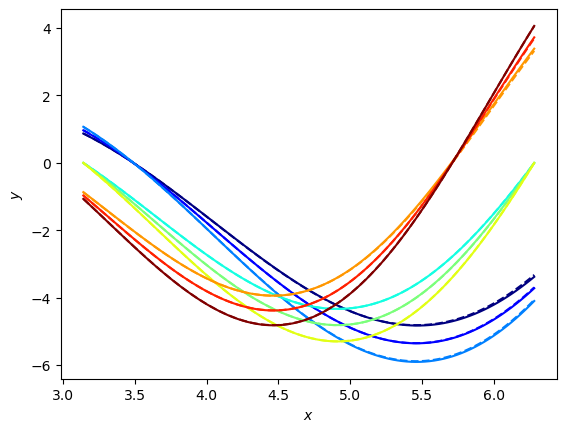

In [6]:
plot(sine, emulator, params)
plt.show()